In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
dataset = pd.read_csv("Carbon Footprint.csv")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Diet                           3279 non-null   object 
 1   Transport                      3279 non-null   object 
 2   Electricity Usage (kWh)        3279 non-null   float64
 3   Vehicle Type                   3279 non-null   object 
 4   Vehicle Monthly Distance Km    3279 non-null   int64  
 5   Heating Energy Source          3279 non-null   object 
 6   Energy efficiency              3279 non-null   object 
 7   How Long TV PC Daily Hour      3279 non-null   int64  
 8   How Long Internet Daily Hour   3279 non-null   int64  
 9   Waste Bag Size                 3279 non-null   object 
 10  Waste Bag Weekly Count         3279 non-null   int64  
 11  How Many New Clothes Monthly   3279 non-null   int64  
 12  Frequency of Traveling by Air  3279 non-null   o

# Checking for any missing data

In [7]:
dataset.isnull().sum()

Diet                             0
Transport                        0
Electricity Usage (kWh)          0
Vehicle Type                     0
Vehicle Monthly Distance Km      0
Heating Energy Source            0
Energy efficiency                0
How Long TV PC Daily Hour        0
How Long Internet Daily Hour     0
Waste Bag Size                   0
Waste Bag Weekly Count           0
How Many New Clothes Monthly     0
Frequency of Traveling by Air    0
CarbonEmission                   0
dtype: int64

As there is no missing data, no need to handle the missing data

In [8]:
dataset.head()

,Diet,Transport,Electricity Usage (kWh),Vehicle Type,Vehicle Monthly Distance Km,Heating Energy Source,Energy efficiency,How Long TV PC Daily Hour,How Long Internet Daily Hour,Waste Bag Size,Waste Bag Weekly Count,How Many New Clothes Monthly,Frequency of Traveling by Air,CarbonEmission
0,omnivore,private,51.0,petrol,2472,wood,Sometimes,14,6,small,1,47,never,2595
1,vegetarian,private,18.0,diesel,8457,coal,Yes,3,6,large,1,5,very frequently,4743
2,vegan,private,55.5,hybrid,5363,wood,Sometimes,9,19,medium,4,11,rarely,1832
3,vegan,private,54.0,lpg,2893,electricity,Sometimes,13,10,large,6,16,rarely,1732
4,vegan,private,31.5,petrol,7622,electricity,Sometimes,6,9,medium,2,37,very frequently,5272


In [94]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

In [121]:
numerical_cols

['Electricity Usage (kWh)',
 'Vehicle Monthly Distance Km',
 'How Long TV PC Daily Hour',
 'How Long Internet Daily Hour',
 'Waste Bag Weekly Count',
 'How Many New Clothes Monthly']

In [122]:
categorical_cols

['Diet',
 'Transport',
 'Vehicle Type',
 'Heating Energy Source',
 'Energy efficiency',
 'Waste Bag Size',
 'Frequency of Traveling by Air']

# Defining a pipeline to handle all issues with the dataset

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

def pipeLine(numerical_cols, categorical_cols, model_type="tree"):
    # Preprocessing for numerical features
    if model_type == "linear":
        num_pipeline = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ])
    else:  # For tree-based models
        num_pipeline = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median"))
            # No scaler, since trees don't need feature scaling
        ])

    # Preprocessing for categorical features
    cat_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    # Combine preprocessing
    preprocessor = ColumnTransformer(transformers=[
        ("num", num_pipeline, numerical_cols),
        ("cat", cat_pipeline, categorical_cols)
    ])

    # Choose model
    if model_type == "linear":
        model = LinearRegression()
    else:
        model = DecisionTreeRegressor(random_state=42)

    # Full pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    return pipeline

# Using Decision Tree Regressor


In [230]:
pipeline = pipeLine(numerical_cols, categorical_cols, model_type="tree")
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Electricity Usage (kWh)',
                                                   'Vehicle Monthly Distance '
                                                   'Km',
                                                   'How Long TV PC Daily Hour',
                                                   'How Long Internet Daily '
                                                   'Hour',
                                                   'Waste Bag Weekly Count',
                                                   'How Many New Clothes '
                                                   'Monthly']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Diet', 'Transport',
                                                   'Vehicle Type',
                                                   'Heating Energy Source',
                                                   'Energy efficiency',
                                                   'Waste Bag Size',
                                                   'Frequency of Traveling by '
                                                   'Air'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

# Prediciting the output of my model

In [231]:
y_pred = pipeline.predict(X_test)

In [232]:
y_pred

array([1576., 2377., 1922., 3449., 2059., 2319., 1874., 2705., 2183.,
       2602., 2046., 4104., 2385., 4335., 5976., 1973., 1765., 4606.,
       3170., 5075., 4658., 4851., 3601., 3314., 2678., 3325., 2654.,
       3218., 4933., 1890., 2342., 3663., 3060., 3998., 2500., 1565.,
       1402., 4663., 4122., 5250., 2046., 3767., 1832., 3892., 2751.,
       5294., 2328.,  940., 3807., 1884., 4209., 2251., 4652., 2307.,
       2738., 2785., 2334., 2823., 1266., 2728., 2933., 1672., 2349.,
       4473., 2539., 2210., 3509., 2326., 4170., 2083., 1502., 1669.,
       1775., 1432., 2447., 4112., 2576., 2886., 2678., 3134., 2451.,
       2988., 2902., 3495., 2573., 2799., 1230., 2624., 5547., 4418.,
       3303.,  830., 2433., 4302., 2266., 6260., 2637., 5306., 2516.,
        953., 4570., 1290., 2036., 4136., 1602., 1850., 2130., 2706.,
       1655., 3529., 1543., 2326., 1835., 4015., 4414., 2009., 4729.,
       2281., 4110., 2458., 2323., 3698., 3317., 2883., 3669., 1451.,
       1681., 1397.,

# Evaluating the model

In [275]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
score = r2_score(y_test, y_pred)

In [276]:
print("New Mean Squared Error:", mse)
print("R^2 Score:", score)
print("No of samples off the prediction:", int(np.sqrt(mse)))

New Mean Squared Error: 472588.8262195122
R^2 Score: 0.6720282827473432
No of samples off the prediction: 687


# Now performing hyperparameter tuning to see if we can improve our Mean Squared Error

In [266]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'regressor__criterion': ['squared_error', 'friedman_mse'],
    'regressor__splitter': ['best', 'random'],
    'regressor__max_depth': randint(3, 21),  # integer values from 3 to 20
    'regressor__max_features': ['sqrt', 'log2', None]
}


In [267]:
import warnings
warnings.filterwarnings('ignore')
random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Electricity '
                                                                                'Usage '
                                                                                '(kWh)',
                                                                                'Vehicle '
                                                                                'Monthly '
                                                                                'Distance '
                                                                                'Km',
                                                                                'How '
                                                                                'Long '
                                                                                'TV '
                                                                                'PC '
                                                                                'Daily '
                                                                                'Hour',
                                                                                'How '
                                                                                'Long '
                                                                                'Internet '
                                                                                'Daily '
                                                                                'Hour',
                                                                                'Waste '
                                                                                'Bag '
                                                                                'Weekly '
                                                                                'Count',
                                                                                'How '
                                                                                'Many '
                                                                                'New '
                                                                                'Clothes...
                                              DecisionTreeRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'regressor__criterion': ['squared_error',
                                                                 'friedman_mse'],
                                        'regressor__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001631B3D2D10>,
                                        'regressor__max_features': ['sqrt',
                                                                    'log2',
                                                                    None],
                                        'regressor__splitter': ['best',
                                                                'random']},
                   random_state=42, scoring='neg_mean_squared_error')

In [268]:
random_search.best_params_

{'regressor__criterion': 'squared_error',
 'regressor__max_depth': 6,
 'regressor__max_features': None,
 'regressor__splitter': 'random'}

In [269]:
new_model = random_search.best_estimator_

In [270]:
y_pred_new = new_model.predict(X_test)

In [277]:
new_mse  =mean_squared_error(y_test,y_pred_new)
new_score = r2_score(y_test, y_pred_new)


In [280]:
print("New Mean Squared Error:", new_mse)
print("NEw R^2 Score:", new_score)
print("After Hyper Parameter Tunning, no of samples off the prediction:", int(np.sqrt(new_mse)))

New Mean Squared Error: 373954.0897440275
NEw R^2 Score: 0.7404797613009263
After Hyper Parameter Tunning, no of samples off the prediction: 611


After hyperparameter tuning, the number of off-target predictions (i.e., predictions significantly deviating from actual values) decreased from 687 to 611. This indicates an improvement in model performance and suggests that tuning helped the Decision Tree Regressor generalize better to the data

# Plotting Predicted vs Actual Value

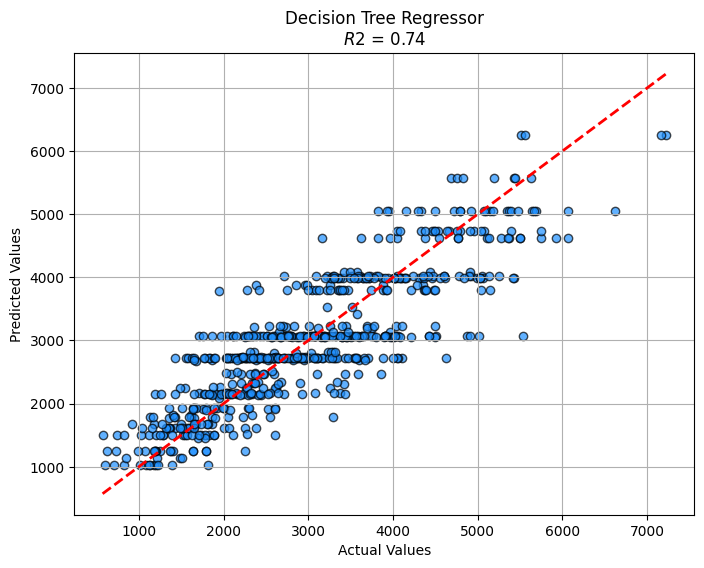

In [281]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_new, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Decision Tree Regressor\n$R2$ = {r2_score(y_test, y_pred_new):.2f}')
plt.grid(True)
plt.show()


The plot suggests that the Decision Tree Regressor predicts reasonably well (R² = 0.74), but exhibits flat prediction bands and struggles slightly with higher-value outputs.

# Residual Plot

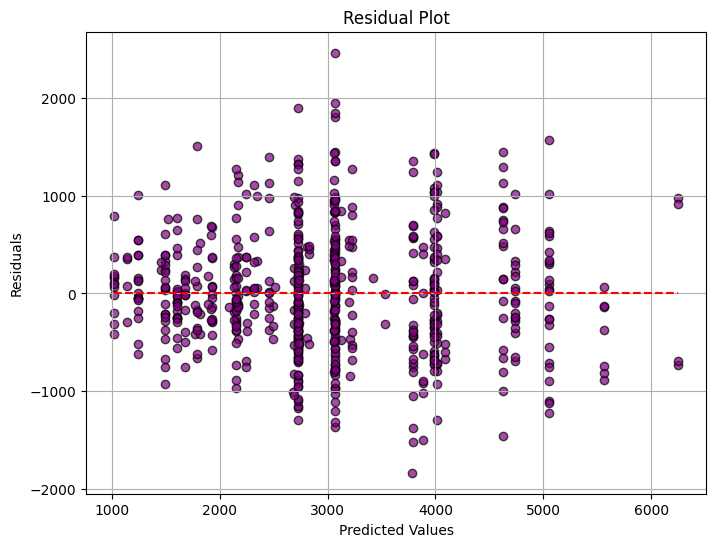

In [282]:
residuals = y_test - y_pred_new

plt.figure(figsize=(8,6))
plt.scatter(y_pred_new, residuals, alpha=0.7, color='purple', edgecolor='k')
plt.hlines(0, min(y_pred_new), max(y_pred_new), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


The plot shows that the model’s errors are mostly random, which is good, but it also repeats the same predictions for many cases, which is typical for decision trees.